# **Fake News** Detection
* **Name:** Arsalan Ali
* **Email:** arslanchaos@gmail.com

## **Introduction**
Now-a-days we see lots of news everywhere whether its print media, digital media or social media.<br>
A lot of times we see news confliction with one another, the reason for this conflict sometimes<br>
can be varying sources but most of the time the main culprit is fake news that's circulating around.

### What is Fake News?
Fake news is a sort of yellow journalism that incorporates pieces of news that may be hoaxes and is often<br>
shared through social media and other online media. This is frequently done to advance or enforce specific beliefs,<br>
and it is frequently accomplished through political agendas. Such news pieces may contain erroneous and/or inflated claims,<br>
and they may be viralized by algorithms, trapping people in a filter bubble.

### Fake News Dataset
The dataset has a shape of 7796×4. The first column identifies the news, the second and third are the title and text,<br>
and the fourth column has labels denoting whether the news is **REAL or FAKE.**

## **Data Preparation**

In [2]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Reading dataset

df = pd.read_csv("news.csv")
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## **Exploratory Data Analysis (EDA)**

### Data Shape

In [9]:
# Step 1: Data shape

rows, columns = df.shape
print(f"Num of Rows: {rows} ") # instances
print(f"Num of Columns: {columns} ") # series
print(f"The size (rows x columns) is: {df.size}") # size
print(f"The Dimensions are: {df.ndim}") # dimensions

Num of Rows: 6335 
Num of Columns: 4 
The size (rows x columns) is: 25340
The Dimensions are: 2


### Data Structure

In [10]:
# Step 2: Data Structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


### Unique Labels in Label-Column

In [11]:
df["label"].unique()

array(['FAKE', 'REAL'], dtype=object)

### Missing Data

In [12]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

### Count Plot of Labels

<AxesSubplot:xlabel='label', ylabel='count'>

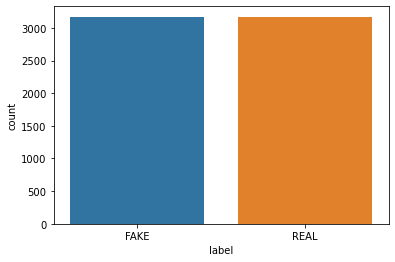

In [13]:
sns.countplot(x="label", data=df)

### Value count of Labels

In [14]:
df["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

### Splitting Dataset into Training and Testing

In [18]:
# Split the dataset
train, test = train_test_split(df, test_size=0.2, random_state=7)

X_train, y_train = train['text'], train['label']
X_test, y_test = test['text'], test['label']

* **X_train:** Independent variable (text) to train the model. Since we specified test_size = 0.2, 80% of observations from the data will be used
* **X_test:** The remaining 20% of independent variables that will be used to test the accuracy of the model
* **y_train:** Dependent variables (label) or target/label that needs to be predicted
* **y_test:** Category labels that will be used to test the accuracy between actual and predicted categories

## **Feature Encoding**
### Term Frequency, Inverse Document Frequency (TF-IDF):
Initialize a TF-IDF with stop words from the English language and a maximum document frequency of 0.7<br>
(terms with a higher document frequency will be discarded). Stop words are the most common words in a language<br>
that are to be filtered out before processing the natural language data.<br>
And a TF-IDF turns a collection of raw documents into a matrix of TF-IDF features.

In [19]:
tf_idf=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set

tfidf_train=tf_idf.fit_transform(X_train) 
tfidf_test=tf_idf.transform(X_test)

## **Modelling**

### ML Algorithm
For our purpose we will use Passive Aggressive Classifer

### PassiveAggressiveClassifier (PAC):
PAC algorithm remains passive for a correct classification outcome, and turns<br>
aggressive in the event of a miscalculation, updating and adjusting. 

Now, we’ll initialize a PassiveAggressiveClassifier. This is. We’ll fit this on tfidf_train and y_train.<br>
Then, we’ll predict on the test set from the TF-IDF and calculate the accuracy with accuracy_score() from sklearn.metrics.

### Model Training and Accuracy

In [25]:
# Initialize a PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

## **Model Evaluation**

### Test Score

In [26]:
# Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.34%


**Model accuracy is 92% and its pretty good**

### F1 Score
* F1 Score is the weighted average of Precision and Recall. 
* Accuracy is used when the True Positives and True negatives are more important
* F1-score is used when the False Negatives and False Positives are crucial.
* F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.
* **F1 Score = 2*(Recall * Precision) / (Recall + Precision)**
* F1 score reaches its best value at 1 and worst score at 0.

In [27]:
from sklearn.metrics import f1_score

print(f"SVM F1: {f1_score(y_test, pac.predict(tfidf_test),labels=['FAKE', 'REAL'],average=None)}")

SVM F1: [0.92368214 0.92319873]


**The scores obtained for positive labels is 0.92, while negative labels is 0.92.**

### Classification Report
To view accuracy and F1 score altogether we can use Classification report

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pac.predict(tfidf_test), labels=['FAKE','REAL']))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.92       638
        REAL       0.92      0.93      0.92       629

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



### Confusion Matrix
We've two labels FAKE and REAL related to news. These are 2 classes. Keep that in mind now:
* **True Positive (TP):** Model correctly predicted Positives (1st class)
* **False Positive (FP):** Model incorrectly predicted Positives

* **True Negative (TN):** Model correctly predicted Negatives (2nd class)
* **False Negative (FN):** Model incorrectly predicted Negatives 


In [29]:
# Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
conf_mat

array([[587,  51],
       [ 46, 583]], dtype=int64)

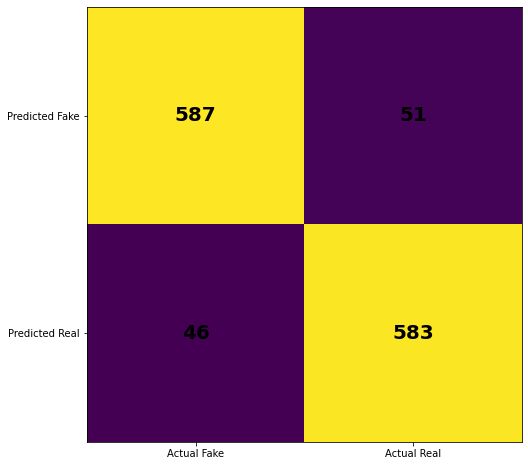

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Fake', 'Predicted Real'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Fake', 'Actual Real'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center',fontsize=20, fontweight=1000, color='black')
plt.show()

Our model correcly predicted, 587 Fake News and 583 Real News with 97 errors in total